## Previous configuration

In [24]:
!pip install tensorflow opencv-python matplotlib
!pip list
!python --version
import tensorflow as tf
import os

# Set GPU Memory Consumption Growth (limit)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

Package                       Version
----------------------------- --------------------
absl-py                       2.0.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

## Load data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

current_working_directory = os.getcwd()
data_directory = os.path.join(os.getcwd(), '..', 'data')

data = tf.keras.utils.image_dataset_from_directory(data_directory)
data_iterator = data.as_numpy_iterator()

Found 2515 files belonging to 36 classes.


In [15]:
batch = data_iterator.next()
print(batch[0].min())
print(batch[0].max())
#print(batch[0]) #batch[0]= img
print(batch[1]) #batch[1]= class

0.0
255.0
[ 0 27 34 12 35 29 27 23  3  2 28 33 28  6 20  0 20 12 12 17 20  3 11 10
  4 28  1  8 12 12 20 35]


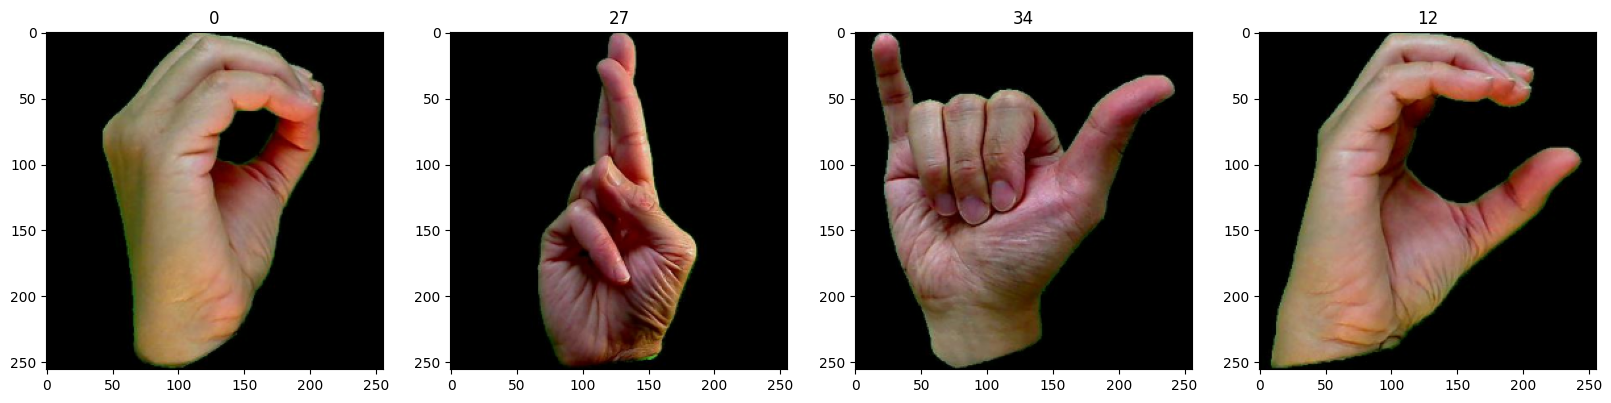

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Procces data

In [17]:
num_classes = 36
data = data.map(lambda x, y: (x / 255, tf.one_hot(y, num_classes))) #Normalize
scale_data_iterator = data.as_numpy_iterator()
batch = scale_data_iterator.next()
print(batch[0].min())
print(batch[0].max())

0.0
1.0


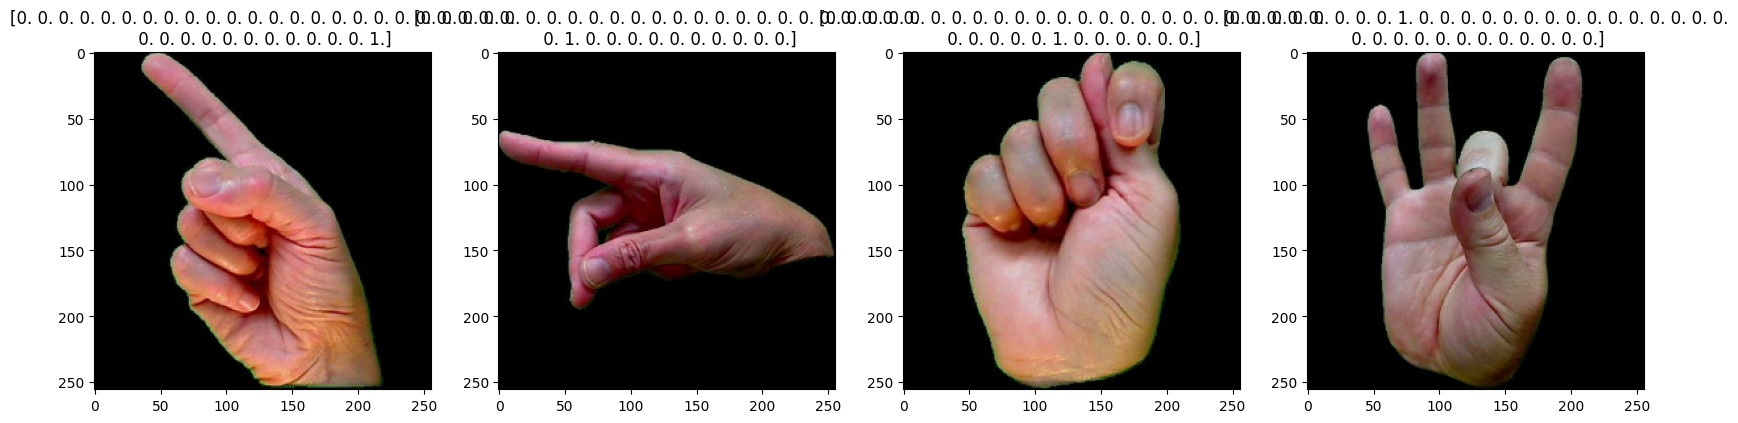

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [19]:
train_size = int(len(data)*.7) #Train 70%
val_size = int(len(data)*.2)+1 #Validation 20%
test_size = int(len(data)*.1)+1 #Test 10%

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

len(data)==train_size+val_size+test_size

True

## Model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = (256, 256, 3)
num_classes = 36

model = Sequential()

# Layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten(all in one vector)
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))  # Regularization

model.add(Dense(num_classes, activation='softmax'))  # Output layer with 36 neurons for 36 classes. Softmax function for multiclass

# Compile (precharge)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Results

In [21]:
epochs = 10
train_steps = len(train)
val_steps = len(val)

#Fit
history = model.fit(train, epochs=epochs, steps_per_epoch=train_steps, validation_data=val, validation_steps=val_steps)

# Test the model
test_results = model.evaluate(test)

# Extracting results
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

Epoch 1/10


55/55 [==============================] - 47s 819ms/step - loss: 1.3069 - accuracy: 0.6398 - val_loss: 0.3811 - val_accuracy: 0.8809
Epoch 2/10
55/55 [==============================] - 43s 787ms/step - loss: 0.2898 - accuracy: 0.9011 - val_loss: 0.2188 - val_accuracy: 0.9316
Epoch 3/10
55/55 [==============================] - 43s 786ms/step - loss: 0.1483 - accuracy: 0.9483 - val_loss: 0.2878 - val_accuracy: 0.9199
Epoch 4/10
55/55 [==============================] - 44s 791ms/step - loss: 0.0931 - accuracy: 0.9665 - val_loss: 0.1757 - val_accuracy: 0.9395
Epoch 5/10
55/55 [==============================] - 44s 790ms/step - loss: 0.0576 - accuracy: 0.9818 - val_loss: 0.1471 - val_accuracy: 0.9551
Epoch 6/10
55/55 [==============================] - 44s 793ms/step - loss: 0.0507 - accuracy: 0.9869 - val_loss: 0.2218 - val_accuracy: 0.9395
Epoch 7/10
55/55 [==============================] - 44s 796ms/step - loss: 0.0518 - accuracy: 0.9881 - val_loss: 0.1832 - val_accuracy: 0.95

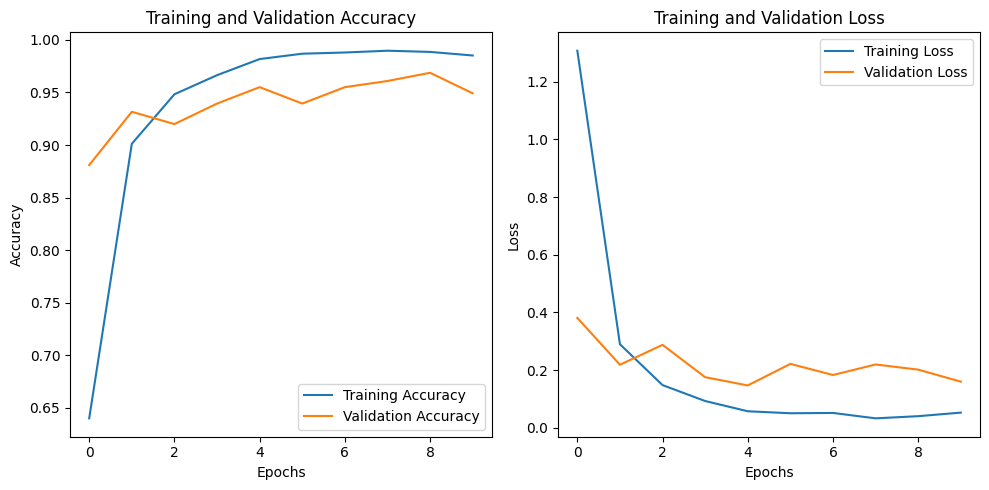

Test Loss: 0.2404107302427292
Test Accuracy: 0.9259259104728699


In [22]:
# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Printing test results
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

In [23]:
model.save('m1')

INFO:tensorflow:Assets written to: m1\assets


INFO:tensorflow:Assets written to: m1\assets
